# Data exploration and feature engineering for predictive analytics

Survival classification using [Titanic dataset](https://www.kaggle.com/c/titanic/data).

Dataset:  
1. You need to upload the titanic train and test datasets to Google Colab.  
2. You should click on the '>' icon to the left (below the title bar), expand the left menu.  
3. Select Files tab.  
4. Click upload to upload the tp3_titanic_data.csv file.  
Note: You need to upload these datasets everytime you reconnect to the notebook.  

Step 1:  Data Exploration.  

Step 2:  Data cleaning and Feature Engineering  

Step 3:  Predictive Modeling using Decision Tree

Step 4:  Predictive Modeling using Neural Network

Step 5:  Accuracy Evaluation






## Load data

In [51]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [52]:
# Make sure you upload the two data files as instructed above.
df_train = pd.read_csv('heart_disease_train.csv')
df_test= pd.read_csv('heart_disease_test_all.csv')

#df=df_test

## Step 1: Data Exploration

In [53]:
df_train.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [54]:
print('Train Shape (rows, columns):', df_train.shape)

Train Shape (rows, columns): (734, 13)


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


In [56]:
# Check missing values
df_train.isnull().sum()

df_train.describe() #Provides summary of the variables

df_train.duplicated().sum() #check for duplicate values

0

In [57]:
def bar_chart(dataframe, feature):
    yes = dataframe[dataframe['HeartDisease']==1][feature].value_counts()
    no = dataframe[dataframe['HeartDisease']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

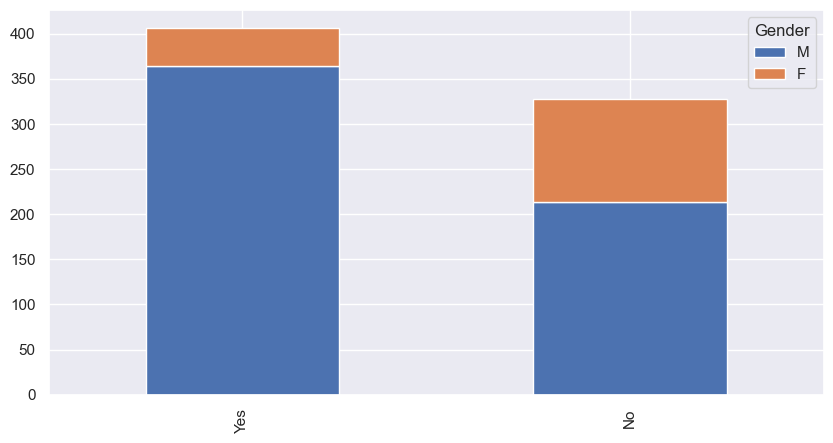

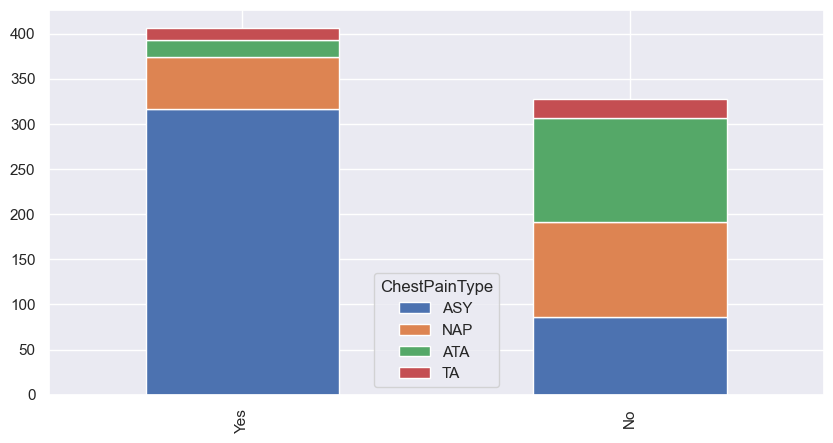

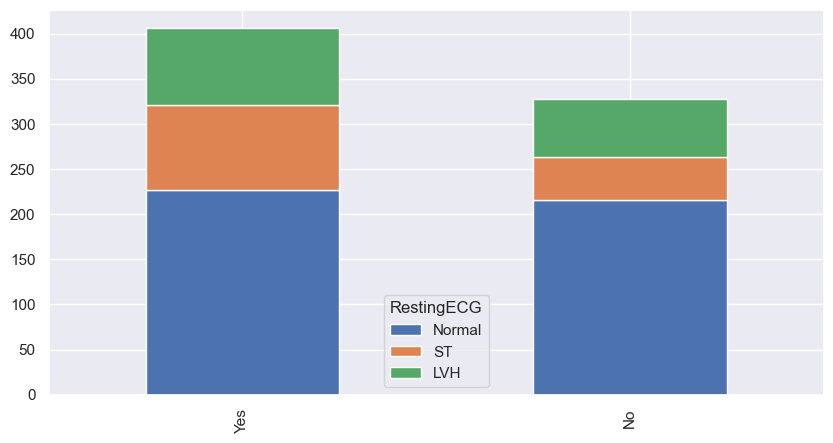

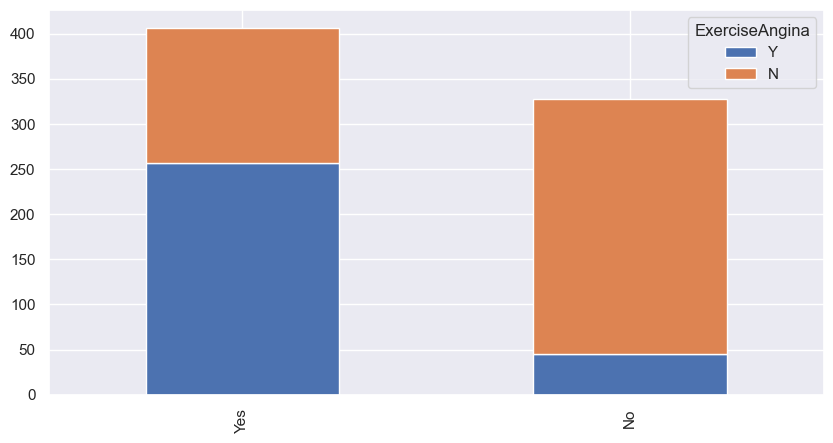

In [58]:
bar_chart(df_train,'Gender') 
bar_chart(df_train,'ChestPainType') 
bar_chart(df_train,'RestingECG')
bar_chart(df_train,'ExerciseAngina')

Step 2: Wrangling and Feature Engineering

### Extracting salutation (title) from passenger name

Passenger name is not useful for this classification task.  
However, deriving the salutation (or title) of each passenger from the name could be useful  (e.g., Mrs, Mr, Ms, Dr.)

In [59]:
def drop(df,feature):
    df.drop(feature, axis=1, inplace=True)

In [60]:
# delete unnecessary feature (i.e., Id) from dataset
drop(df_train,"Id")
drop(df_test,"Id")

Why did we remove name and kept title separately?  (Hint: Nominal variables)

### Transforming gender from categorical to numerical attribute.

Transform Sex column to numeric format.

In [61]:
# What do we have?
def eda(df):
    #Mapping of Categorical variables
    sex_mapping = {"M": 0, "F": 1}
    df['Gender'] = df['Gender'].map(sex_mapping)
    chestpain_mapping = {"ATA": 0, "ASY": 1, "NAP": 2,"TA":3}
    df['ChestPainType'] = df['ChestPainType'].map(chestpain_mapping)

    RestingECG_mapping = {"Normal": 0, "ST": 1, "LVH": 2}
    df['RestingECG'] = df['RestingECG'].map(RestingECG_mapping)

    ExerciseAngina_mapping = {"N": 0, "Y": 1}
    df['ExerciseAngina'] = df['ExerciseAngina'].map(ExerciseAngina_mapping)

    ST_Slope_mapping = {"Down": 0, "Flat": 1, "Up":2}
    df['ST_Slope'] = df['ST_Slope'].map(ST_Slope_mapping)
    #Binning of Age
    df.loc[ df['Age'] <= 25, 'Age'] = 0
    df.loc[(df['Age'] > 26) & (df['Age'] <= 40), 'Age'] = 1
    df.loc[(df['Age'] >= 41) & (df['Age'] <= 55), 'Age'] = 2
    df.loc[(df['Age'] >= 56) & (df['Age'] <= 60), 'Age'] = 3
    df.loc[ df['Age'] > 60, 'Age'] = 4
    #Replace 0 values
    df["RestingBP"].replace(0,df["RestingBP"].median(),inplace=True)  # Use median value for replacement
    df["Cholesterol"].replace(0,df["Cholesterol"].median(),inplace=True)  # Use median value for replacement

    # Binning of RestingBP
    #Hypotension: Less than 90
    #Normal: 90 to 119
    #Elevated: 120 to 129
    #Hypertension Stage 1: 130 to 139
    #Hypertension Stage 2: 140 to 179
    #Hypertensive Crisis: 180 or higher
    
    df.loc[ df['RestingBP'] <= 90, 'RestingBP'] = 0
    df.loc[(df['RestingBP'] >= 90) & (df['RestingBP'] <= 119), 'RestingBP'] = 1
    df.loc[(df['RestingBP'] >= 120) & (df['RestingBP'] <= 129), 'RestingBP'] = 2
    df.loc[(df['RestingBP'] >= 130) & (df['RestingBP'] <= 139), 'RestingBP'] = 3
    df.loc[(df['RestingBP'] >= 140) & (df['RestingBP'] <= 179), 'RestingBP'] = 4
    df.loc[ df['RestingBP'] >= 180, 'RestingBP'] = 5
    return df

In [62]:
df_train= eda(df_train)
df_test= eda(df_test)

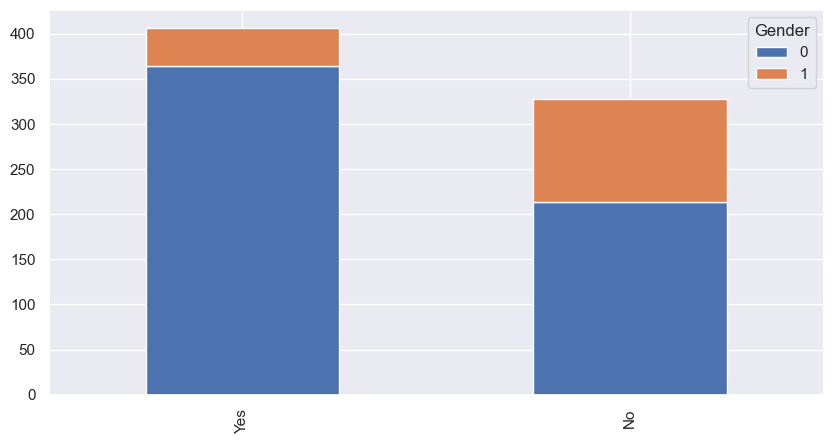

In [63]:
bar_chart(df_train, 'Gender')

In [64]:
#transform variables to numberic format (except Gender)

### Missing value imputation and Binning

Missing value imputation for the Age attribute. Use median age based on the title attribute for missing Age.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

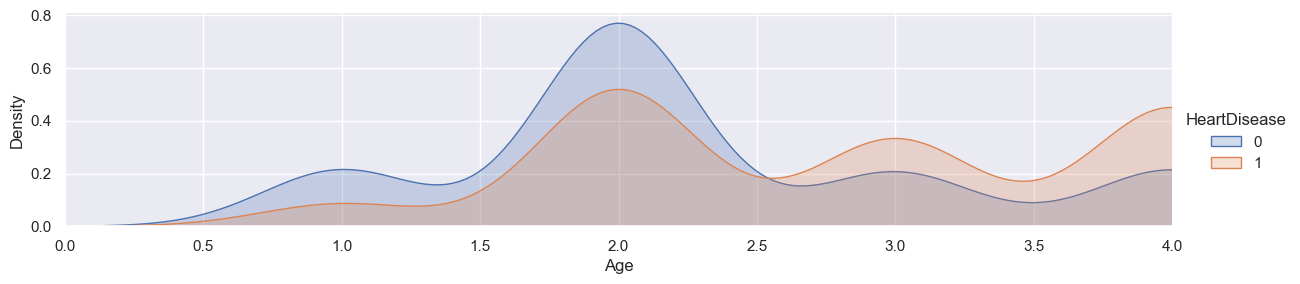

In [65]:
# Age distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

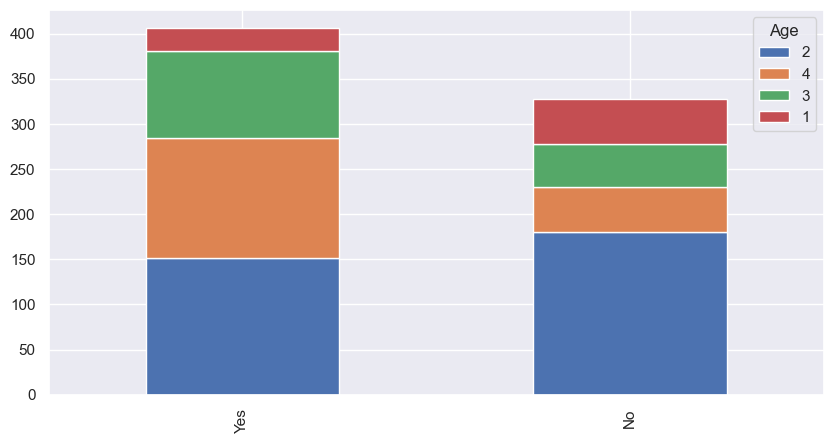

In [66]:
bar_chart(df_train, 'Age')

In [67]:
print('Run complete')

Run complete


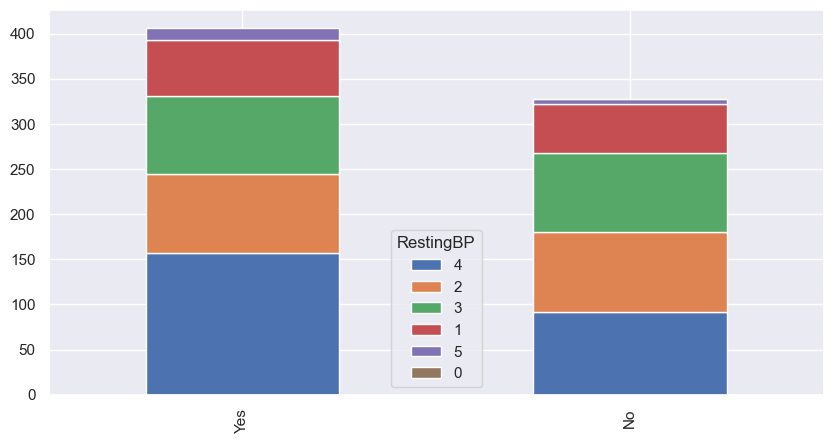

In [68]:
bar_chart(df_train, 'RestingBP')

### Data Split

In [69]:
from sklearn.model_selection  import train_test_split



Y_train = df_train['HeartDisease']
X_train = df_train.drop('HeartDisease', axis=1)

Y_validation = df_test['HeartDisease']
X_validation = df_test.drop('HeartDisease', axis=1)


print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_validation.shape)

Train Shape (rows, columns): (734, 11)
Validation Shape (rows, columns): (184, 11)


## Step 3: Modelling - Decision Tree Classification

In [70]:
from sklearn.tree import DecisionTreeClassifier

There are number of parameters that can be fine-tuned for improved accuracy.  
Parameters can be found in the API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict1 = clf.predict(X_validation)

### Accuracy Evaluation

We consider 3 metrics to evaluate this classification model.  
1. Accuracy  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
2. Confusion Matrix  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
3. Precision and Recall  (API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)  

In [72]:
# Evaluate Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_validation, Y_predict1)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 79.89%


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_validation, Y_predict1, labels=[0, 1])

array([[67, 15],
       [22, 80]], dtype=int64)

In [74]:
# Evaluate precision and recall
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f_score, support = precision_recall_fscore_support(Y_validation, Y_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

print(classification_report(Y_validation, Y_predict1))

precision: 0.7526881720430108(0), 0.8681318681318682(1)
recall: 0.8536585365853658(0), 0.7745098039215687(1)
f_score: 0.8(0), 0.8186528497409328(1)
support: 82(0), 102(1)
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        82
           1       0.84      0.78      0.81       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



### Visualize the decision tree  
We would need following libraries to display the tree.  
Note that the column names are ordered as they appear in the input dataframe.  
i.e., (X1=Pclass, X2=Sex, X3=Age, X4=Fare, X5=Cabin, X6=Embarked, X7=Title)

In [75]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [76]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

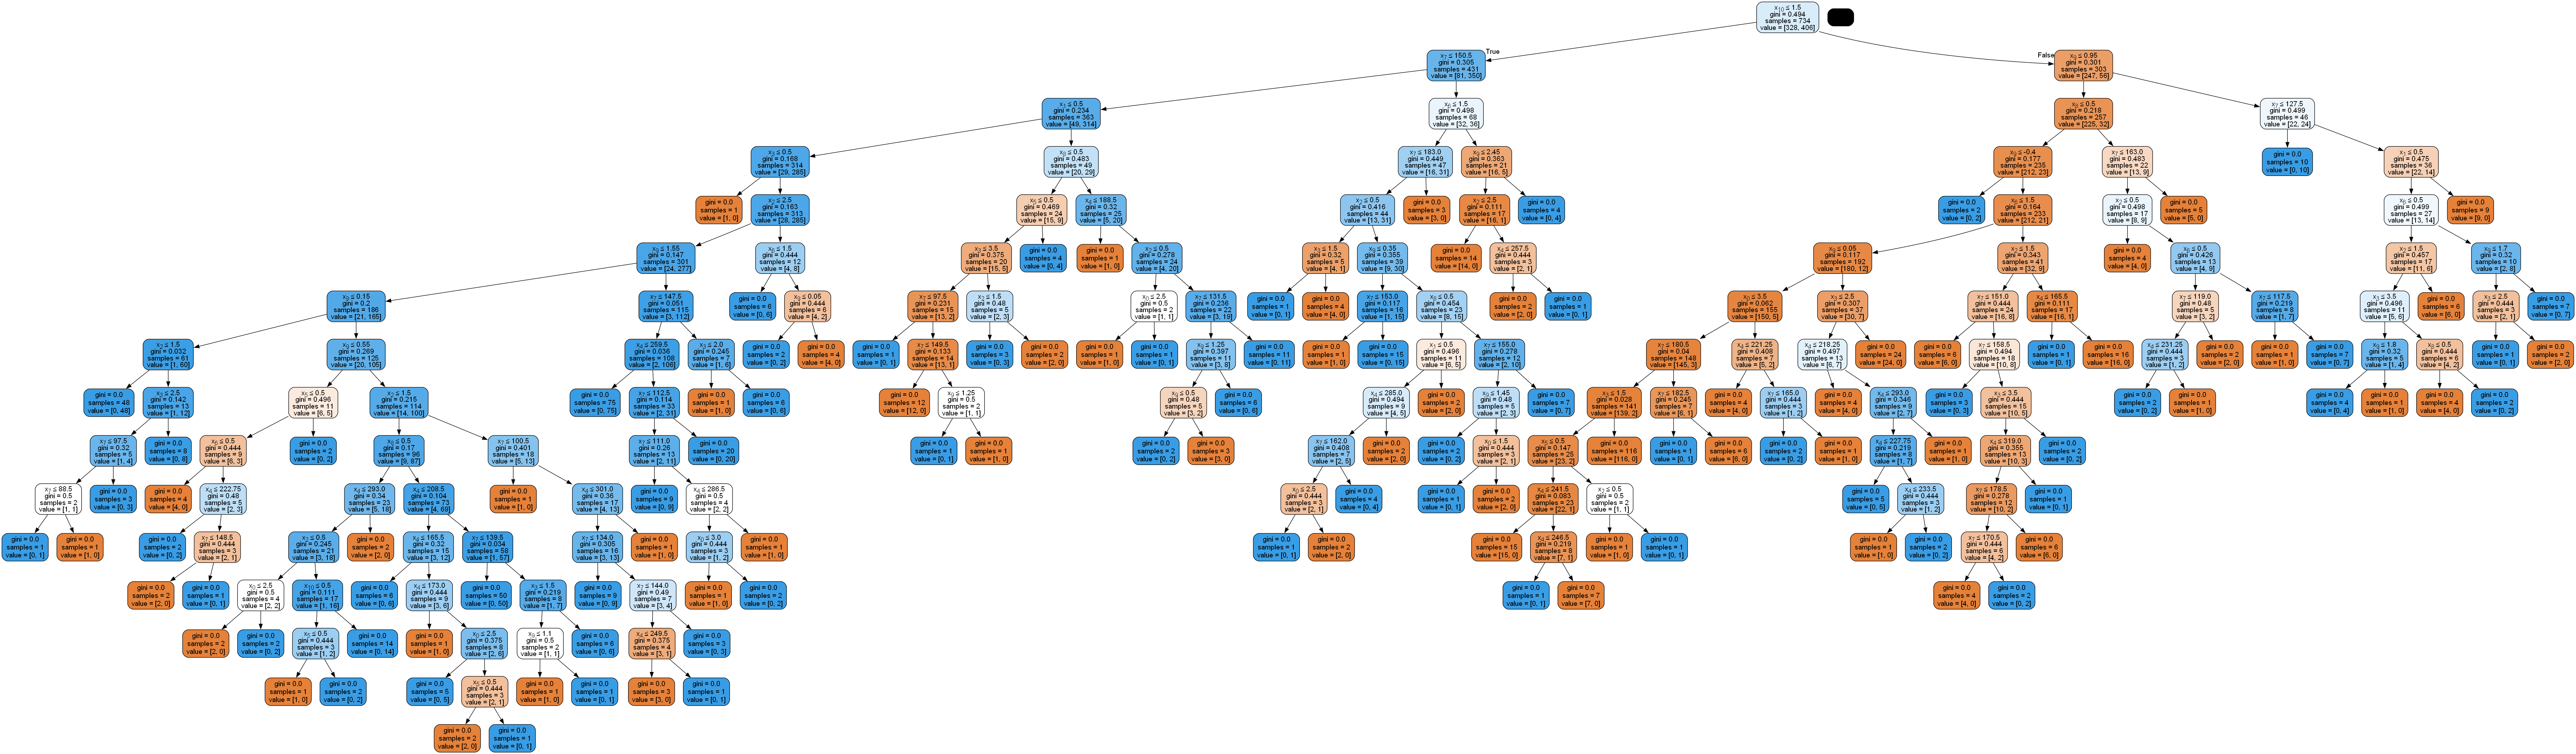

In [77]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Gender          734 non-null    int64  
 2   ChestPainType   734 non-null    int64  
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    float64
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    int64  
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    int64  
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 63.2 KB


##Step 4: Modelling - Neural Network Classification

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [81]:
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [82]:
Y_predict = mlp.predict(X_validation)

### Accuracy Evaluation

In [83]:
# Evaluate Accuracy
accuracy = accuracy_score(Y_validation, Y_predict)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 81.52%


In [84]:
confusion_matrix(Y_validation, Y_predict, labels=[0, 1])

array([[71, 11],
       [23, 79]], dtype=int64)

In [85]:
# Evaluate precision and recall
precision, recall, f_score, support = precision_recall_fscore_support(Y_validation, Y_predict, labels=[0, 1])
print('precision: {}(0), {}(1)'.format(precision[0], precision[1]))
print('recall: {}(0), {}(1)'.format(recall[0], recall[1]))
print('f_score: {}(0), {}(1)'.format(f_score[0], f_score[1]))
print('support: {}(0), {}(1)'.format(support[0], support[1]))

print(classification_report(Y_validation, Y_predict))

precision: 0.7553191489361702(0), 0.8777777777777778(1)
recall: 0.8658536585365854(0), 0.7745098039215687(1)
f_score: 0.8068181818181819(0), 0.8229166666666667(1)
support: 82(0), 102(1)
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.88      0.77      0.82       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [86]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Y_train = df_train['HeartDisease']
X_train = df_train.drop('HeartDisease', axis=1)

Y_validation = df_test['HeartDisease']
X_validation = df_test.drop('HeartDisease', axis=1)
 
# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
 
# Predict and evaluate
y_pred = rf.predict(X_validation)
print(classification_report(Y_validation, y_pred))




              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [87]:
accuracy = accuracy_score(Y_validation, y_pred)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

Validation Accuracy: 87.50%


In [92]:
from xgboost import XGBClassifier

# Modeling
gbc_model = XGBClassifier()
gbc_model.fit(X_train,Y_train)

# Classification
Y_pred2 = gbc_model.predict(X_validation)

# Evaluate
accuracy = accuracy_score(Y_validation, Y_pred2)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

print(classification_report(Y_validation, Y_pred2))

Validation Accuracy: 83.70%
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.87      0.83      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
#### Model Comparison

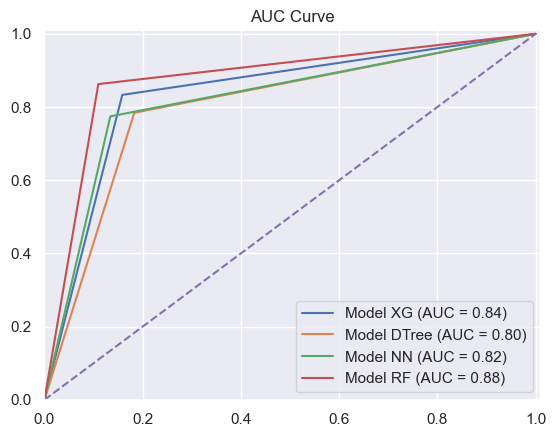

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc_dtree = roc_auc_score(Y_validation, Y_predict1)
auc_nn = roc_auc_score(Y_validation, Y_predict)
auc_rf = roc_auc_score(Y_validation, y_pred)
auc_xg = roc_auc_score(Y_validation, Y_pred2)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_pred2, pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(Y_validation, Y_predict1, pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(Y_validation, Y_predict, pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(Y_validation, y_pred, pos_label=1)

#plt.plot(fpr, tpr,fpr1,tpr1,fpr2,tpr2,fpr3,tpr3)
plt.plot(fpr, tpr, label=f'Model XG (AUC = {auc_xg:.2f})')
plt.plot(fpr1, tpr1, label=f'Model DTree (AUC = {auc_dtree:.2f})')
plt.plot(fpr2, tpr2, label=f'Model NN (AUC = {auc_nn:.2f})')
plt.plot(fpr3, tpr3, label=f'Model RF (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [112]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_train)

record_id = 4

print('Actual values:')
print(X_train.iloc[record_id,:])

print('Survival Status:')
print(Y_train.iloc[record_id,:])
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
#shap.initjs()

Actual values:
Age                 2.0
Gender              0.0
ChestPainType       0.0
RestingBP           4.0
Cholesterol       292.0
FastingBS           1.0
RestingECG          0.0
MaxHR             143.0
ExerciseAngina      1.0
Oldpeak             2.0
ST_Slope            1.0
Name: 4, dtype: float64
Survival Status:


IndexingError: Too many indexers

In [111]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.plots.force(shap_values[record_id])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
# visualize the prediction of given record id
shap.plots.waterfall(shap_values[record_id])

In [ ]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"RestingBP"], color=shap_values)

shap.plots.scatter(shap_values[:, "RestingBP"], color=shap_values[:,"Age"])

## Reference Documents

*   [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
*   [Titanic Solution with sklearn classifiers](https://www.kaggle.com/minsukheo/titanic-solution-with-sklearn-classifiers)

